# Dataset exploration and analysis


### Imports

In [3]:
import os

import numpy as np
import pandas as pd
import itertools as it
import matplotlib.pyplot as plt

from collections import Counter

from typing import List, Set, Dict, Tuple, Optional, Set, Iterable

from IPython.display import display


In [4]:
#@title Configuration
IS_COLAB = False # @param { type: "boolean" }
DS_PATH = "../language-modeling/penn_treebank" #@param { type: "string" }

### Colab setup

In [5]:
if IS_COLAB:
  from google.colab import drive
  drive.mount('/content/drive', force_remount=True)

### Dataset preparation

In [6]:
# Get the dataset
!wget -o log --show-progress --progress=bar https://data.deepai.org/ptbdataset.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
!rm -rf $DS_PATH
!mkdir -p $DS_PATH
!unzip -d $DS_PATH ptbdataset.zip


'rm' is not recognized as an internal or external command,
operable program or batch file.
The syntax of the command is incorrect.
unzip:  cannot find either ptbdataset.zip or ptbdataset.zip.zip.


In [8]:
ptb_train_path = "ptb.train.txt"
ptb_test_path = "ptb.test.txt"
ptb_valid_path = "ptb.valid.txt"

# Dataset exploration

## Utilities

In [9]:
def get_sents_from_file(file_name: str) -> List[str]:
  sents: List[str] = []
  with open(f'{DS_PATH}/{file_name}') as file:
    for sent in file:
      sents.append(sent)
  return sents

In [10]:
def get_words_from_sents(sents: List[str]) -> List[str]:
  words: List[str] = []
  for sent in sents:
    words.extend(sent.split())
  return words 

In [11]:
def get_vocab(words: List[str]) -> Set[str]:
  '''
  Penn Treebank is already lowercased
  '''
  return set(words)

In [12]:
def compute_set_difference(a: Set, b: Set) -> Set:
    return a - b

In [13]:
def compute_set_intersection(a: Set, b: Set) -> Set:
    return a.intersection(b)

In [14]:
def plot_stats(
        sents: List[List[str]], 
        words: List[List[str]], 
        vocabs: List[List[str]]) -> None:

    splits = ['train', 'test', 'valid']
    cols = ['sentences', 'words', 'vocab size']

    data = {col: [len(l) for l in split] for col, split in zip(cols, [sents, words, vocabs])}

    table = pd.DataFrame(data, index = splits)
    display(table)

In [47]:
def plot_split_percentage(
        sents: List[List[str]], 
        words: List[List[str]]) -> None:

    splits = ['train', 'test', 'valid']
    cols = ['sentences', 'words', 'vocab size']


    sents_tot = sum([len(l) for l in sents])
    words_tot = sum([len(l) for l in words])
    sents_perc = [len(l) / sents_tot for l in sents]
    words_perc = [len(l) / words_tot for l in words]

    df = pd.DataFrame()
    for split, sp, wp in zip(splits, sents_perc, words_perc):
        df[split] = [f"{sp*100:.2f}%", f"{wp*100:.2f}%"]
    df.index = ["sents", "words"]
    # df.set
    display(df)

    fig, axs = plt.subplots(1, 2)
    for idx, (col, data) in enumerate(zip(cols, [sents_perc, words_perc])):
        axs[idx].set_title(f'{col} split percentage')
        axs[idx].pie(
            data, 
            labels = splits, 
            autopct = '%1.1f%%',
            shadow = True, 
            startangle = 90,
            )

    plt.show()

In [16]:
def print_oov_words(vocabs: Iterable, train_vocab: Set[str]) -> None:
    oov_words_list = []
    for vocab in vocabs:
        oov_words_list.append(compute_set_difference(vocab, train_vocab))
    names = ['test oov words', 'valid oov words']
    data = {name: [len(oovs)] for (name, oovs) in zip(names, oov_words_list)}
    table = pd.DataFrame(data, index=['size'])
    display(table)

In [17]:
from statistics import mean, median, stdev

def plot_sentences_lengths_distribution(sents: List[str]) -> None:
        raw_lengths = [len(sent.split()) for sent in sents]
        counts = Counter(raw_lengths)
        counts = dict(sorted(counts.items(), key=lambda item: item[0]))
        lengths = counts.keys()
        occ = counts.values()

        print(f"max lengths: {max(lengths)}")
        print(f"min lengths: {min(lengths)}")
        print(f"lengths mean: {mean(raw_lengths)}")
        print(f"lengths median: {median(raw_lengths)}")
        print(f"lengths stabdard deviation: {stdev(raw_lengths)}")

        y_pos = np.arange(len(lengths))

        fig,ax = plt.subplots(1,1)    
        # axs[0].barh(y_pos, vals,  align='center')
        # axs[0].set_yticks(y_pos, labels=keys)
        # axs[0].invert_yaxis()  # labels read top-to-bottom
        # axs[0].set_xlabel('Occurrencies')
        # axs[0].set_title(f'{split_name} 10 most frequent words')
        ax.bar(y_pos, occ,  align='center')
        plt.show()

## Dataset statistics

In [18]:
sents_train = get_sents_from_file(ptb_train_path)
sents_test = get_sents_from_file(ptb_test_path)
sents_valid = get_sents_from_file(ptb_valid_path)

words_train = get_words_from_sents(sents_train)
words_test = get_words_from_sents(sents_test)
words_valid = get_words_from_sents(sents_valid)

vocab_train = get_vocab(words_train)
vocab_test = get_vocab(words_test)
vocab_valid = get_vocab(words_valid)

In [19]:
sents_train[:20]

[' aer banknote berlitz calloway centrust cluett fromstein gitano guterman hydro-quebec ipo kia memotec mlx nahb punts rake regatta rubens sim snack-food ssangyong swapo wachter \n',
 ' pierre <unk> N years old will join the board as a nonexecutive director nov. N \n',
 ' mr. <unk> is chairman of <unk> n.v. the dutch publishing group \n',
 ' rudolph <unk> N years old and former chairman of consolidated gold fields plc was named a nonexecutive director of this british industrial conglomerate \n',
 ' a form of asbestos once used to make kent cigarette filters has caused a high percentage of cancer deaths among a group of workers exposed to it more than N years ago researchers reported \n',
 ' the asbestos fiber <unk> is unusually <unk> once it enters the <unk> with even brief exposures to it causing symptoms that show up decades later researchers said \n',
 ' <unk> inc. the unit of new york-based <unk> corp. that makes kent cigarettes stopped using <unk> in its <unk> cigarette filters in

In [20]:
sents_valid[:20]

[' consumers may want to move their telephones a little closer to the tv set \n',
 " <unk> <unk> watching abc 's monday night football can now vote during <unk> for the greatest play in N years from among four or five <unk> <unk> \n",
 ' two weeks ago viewers of several nbc <unk> consumer segments started calling a N number for advice on various <unk> issues \n',
 " and the new syndicated reality show hard copy records viewers ' opinions for possible airing on the next day 's show \n",
 ' interactive telephone technology has taken a new leap in <unk> and television programmers are racing to exploit the possibilities \n',
 ' eventually viewers may grow <unk> with the technology and <unk> the cost \n',
 ' but right now programmers are figuring that viewers who are busy dialing up a range of services may put down their <unk> control <unk> and stay <unk> \n',
 " we 've been spending a lot of time in los angeles talking to tv production people says mike parks president of call interactive w

In [21]:
sents_test[:20]

[" no it was n't black monday \n",
 " but while the new york stock exchange did n't fall apart friday as the dow jones industrial average plunged N points most of it in the final hour it barely managed to stay this side of chaos \n",
 ' some circuit breakers installed after the october N crash failed their first test traders say unable to cool the selling panic in both stocks and futures \n',
 " the N stock specialist firms on the big board floor the buyers and sellers of last resort who were criticized after the N crash once again could n't handle the selling pressure \n",
 ' big investment banks refused to step up to the plate to support the beleaguered floor traders by buying big blocks of stock traders say \n',
 " heavy selling of standard & poor 's 500-stock index futures in chicago <unk> beat stocks downward \n",
 ' seven big board stocks ual amr bankamerica walt disney capital cities\\/abc philip morris and pacific telesis group stopped trading and never resumed \n',
 ' the <unk

In [41]:
plot_stats(
    [sents_train, sents_test, sents_valid],
    [words_train, words_test, words_valid],
    [vocab_train, vocab_test, vocab_valid],
)

,sentences,words,vocab size
train,42068,887521,9999
test,3761,78669,6048
valid,3370,70390,6021


,train,test,valid
sents,85.51%,7.64%,6.85%
words,85.62%,7.59%,6.79%


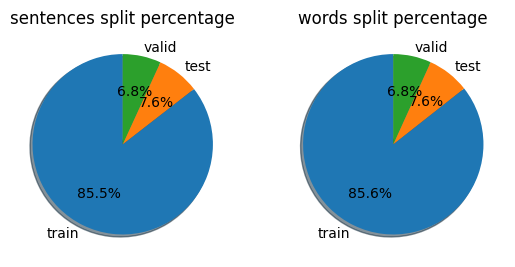

In [48]:
plot_split_percentage(
    [sents_train, sents_test, sents_valid],
    [words_train, words_test, words_valid]
)

## OOV words

In [24]:
print_oov_words([vocab_test, vocab_valid], vocab_train)

,test oov words,valid oov words
size,0,0


## Words frequency

In [51]:
def compute_word_frequencies(words: List[str]) -> Dict[str, int]:
    counts = Counter(words)
    return counts

def reverse_sort_frequency_counter(counts: Counter, cutoff: int = 0) -> Dict[str, int]:
    truncate = len(counts) - cutoff
    return dict(sorted(dict(counts).items(), key=lambda item: item[1], reverse=True)[:cutoff])

def plot_word_stats(words: Set[str], split_name: str, cutoff: int = 10) -> None:
    counts = compute_word_frequencies(words)
    counts = reverse_sort_frequency_counter(counts, cutoff)
    
    keys = list(counts.keys())
    vals = list(counts.values())

    sum_counts_frequencies = sum(vals)

    plt.rcdefaults()
    fig, axs = plt.subplots(1,2, figsize=(21,7))
    y_pos = np.arange(len(keys))

    axs[0].barh(y_pos, vals,  align='center')
    axs[0].set_yticks(y_pos, labels=keys)
    axs[0].invert_yaxis()  # labels read top-to-bottom
    # axs[0].set_xlabel('Occurrencies')
    # axs[0].set_title(f'{split_name} 10 most frequent words ({split_name})')
    # axs[0].bar(y_pos, vals,  align='center')

    # plot pie chart
    keys.append("Others")
    vals.append(len(words) - sum_counts_frequencies)

    theme = plt.get_cmap('bwr')
    axs[1].set_prop_cycle("color", [theme(1. * i / len(keys))
                             for i in range(len(keys))])
    # axs[1].set_title("Percentage")
    axs[1].pie(
        [v / len(words) for v in vals], 
        labels = keys, 
        autopct = '%1.1f%%',
        shadow = True, 
        startangle = 90,
        radius=1.
        )

    plt.show()

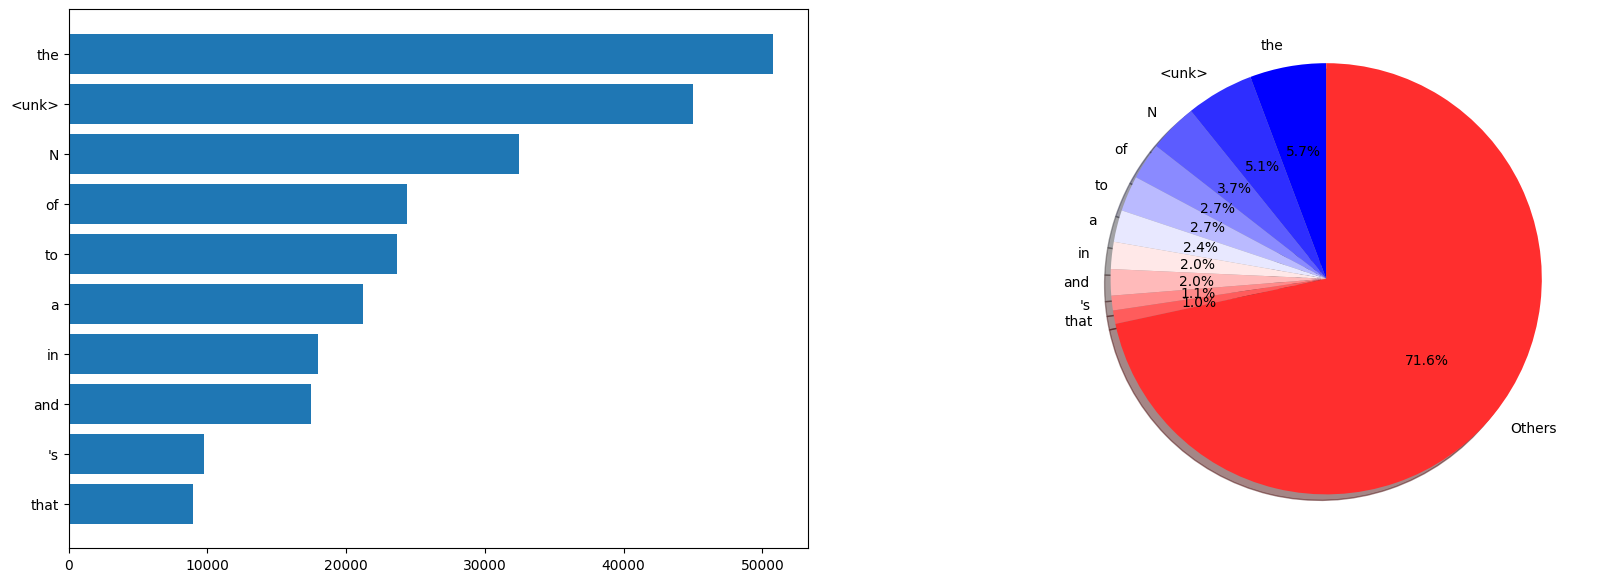

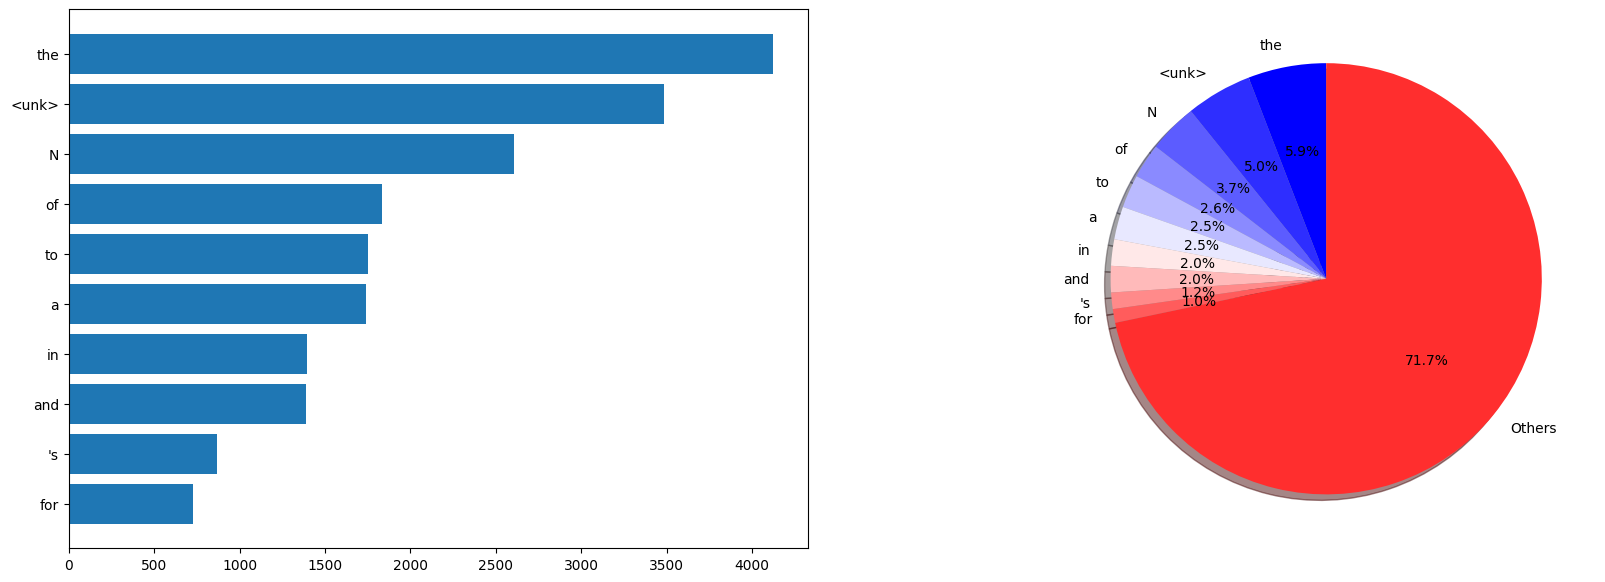

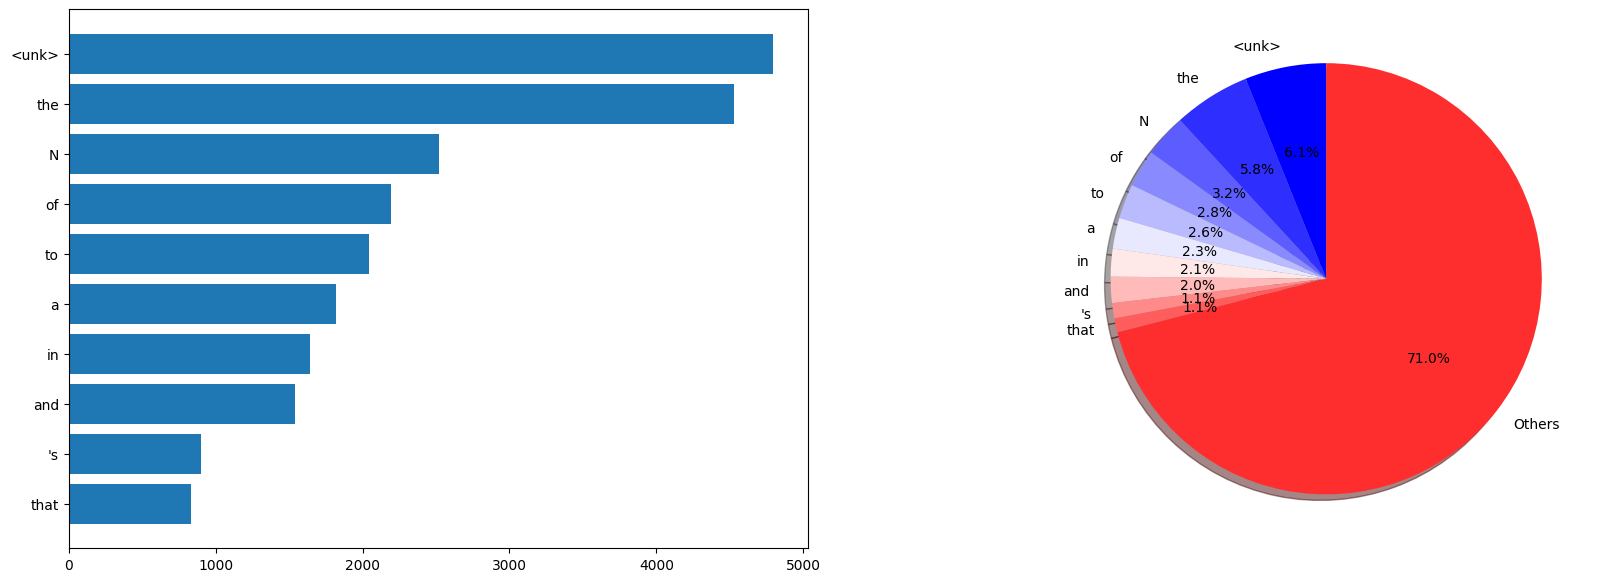

In [52]:
plot_word_stats(words_train, "Train")
plot_word_stats(words_valid, "Validation")
plot_word_stats(words_test, "Test")

In [53]:
def plot_full_word_freq_histogram(words: Set[str], split_name: str, cutoff: int = 200) -> None:
    counts = compute_word_frequencies(words)
    counts = reverse_sort_frequency_counter(counts, cutoff)
    
    keys = list(counts.keys())
    vals = list(counts.values())

    plt.rcdefaults()
    fig, ax = plt.subplots(1,1, figsize=(21,7))
    y_pos = np.arange(len(keys))

    ax.bar(y_pos, vals,  align='center')
    # ax.set_yticks(y_pos, labels=keys)
    ax.set_xlabel('Rank')
    ax.set_title(f'{split_name} set, frequency/rank of the first {cutoff} most frequent words')


    plt.show()

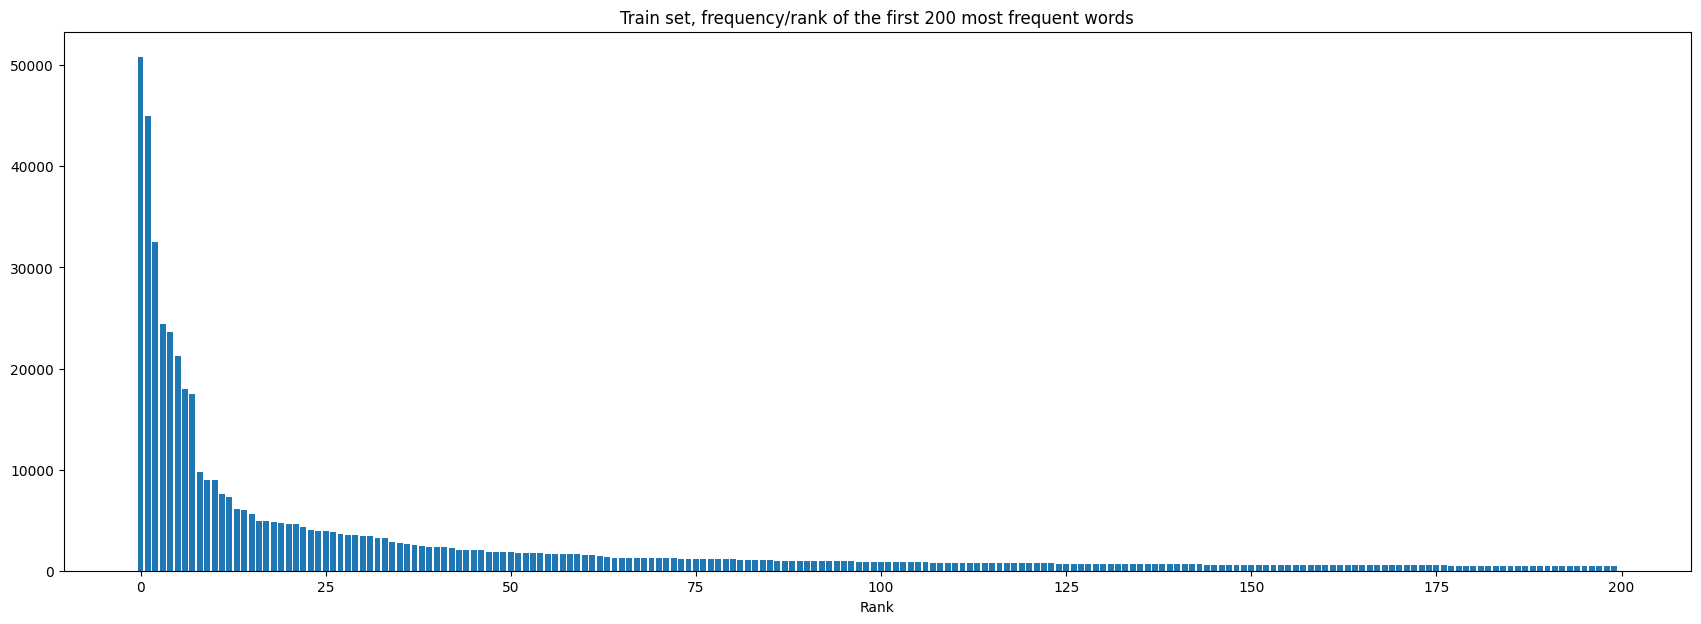

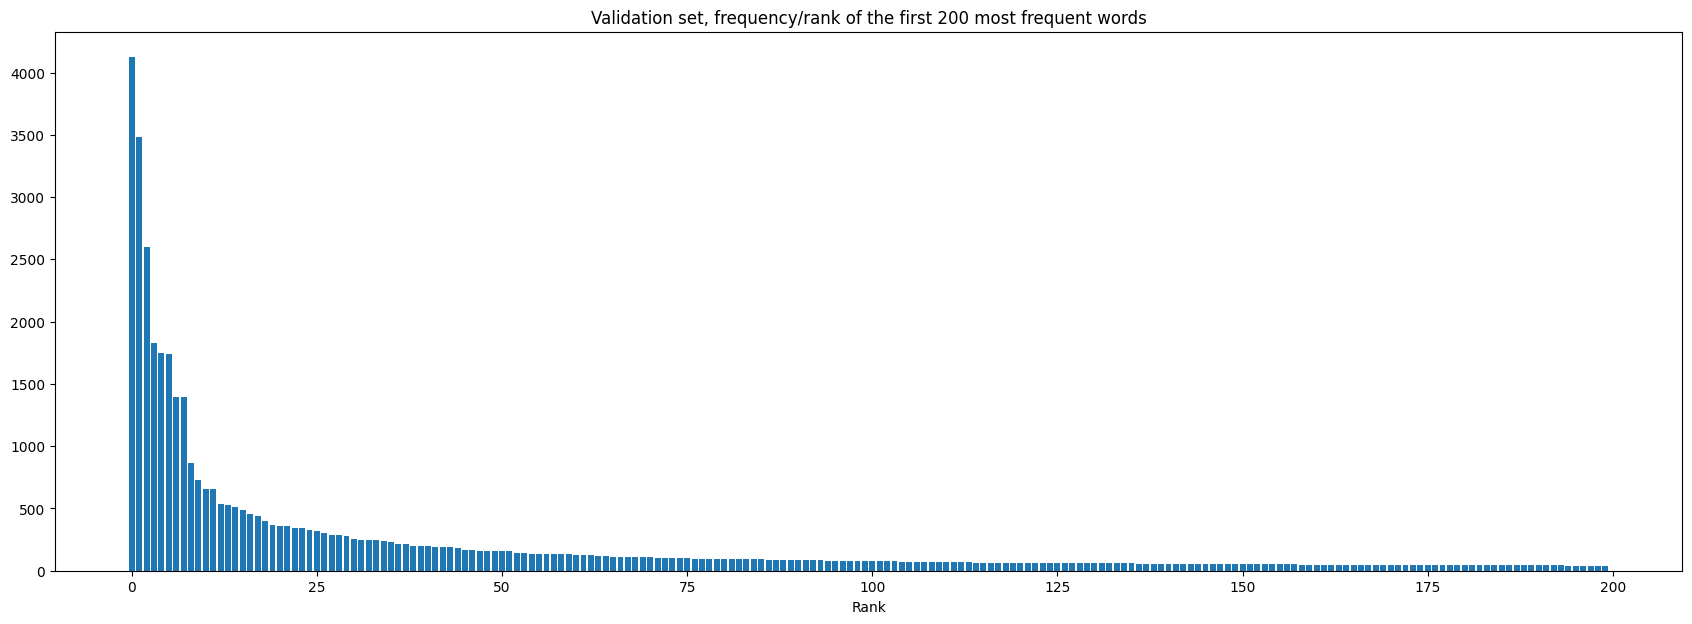

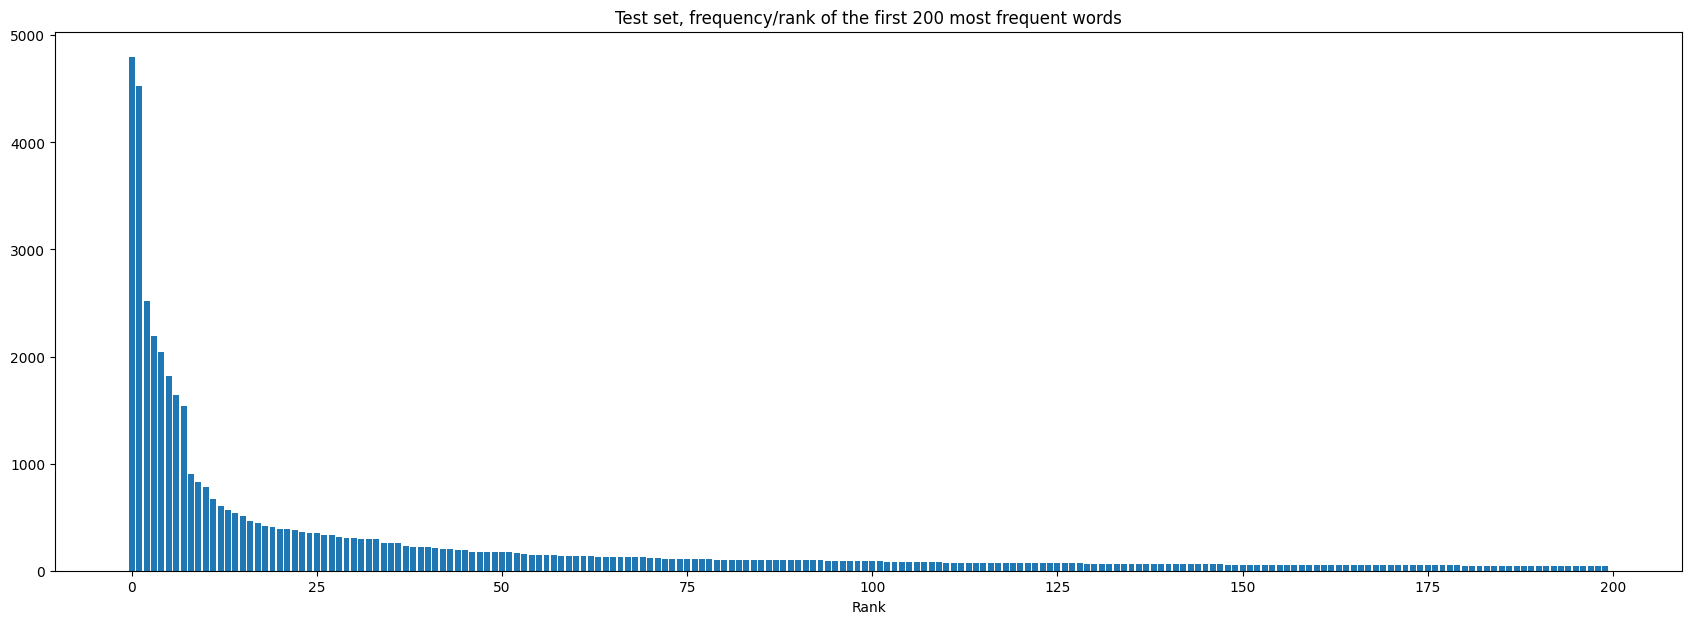

In [54]:
cutoff = 200
plot_full_word_freq_histogram(words_train, "Train", cutoff=cutoff)
plot_full_word_freq_histogram(words_valid, "Validation", cutoff=cutoff)
plot_full_word_freq_histogram(words_test, "Test", cutoff=cutoff)

## Sentences statistics

max lengths: 82
min lengths: 1
lengths mean: 21.097294855947514
lengths median: 20.0
lengths stabdard deviation: 10.144814902562084


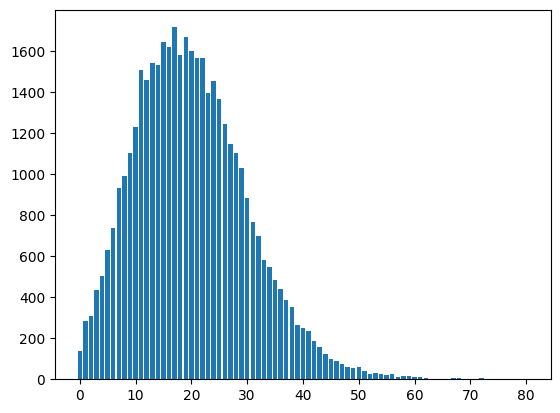

In [55]:
plot_sentences_lengths_distribution(sents_train)

max lengths: 74
min lengths: 1
lengths mean: 20.887240356083087
lengths median: 20.0
lengths stabdard deviation: 9.980556213243247


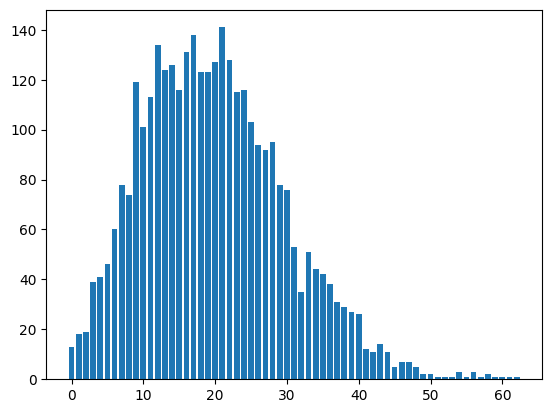

In [56]:
plot_sentences_lengths_distribution(sents_valid)

max lengths: 77
min lengths: 1
lengths mean: 20.917043339537358
lengths median: 20
lengths stabdard deviation: 10.189613473787691


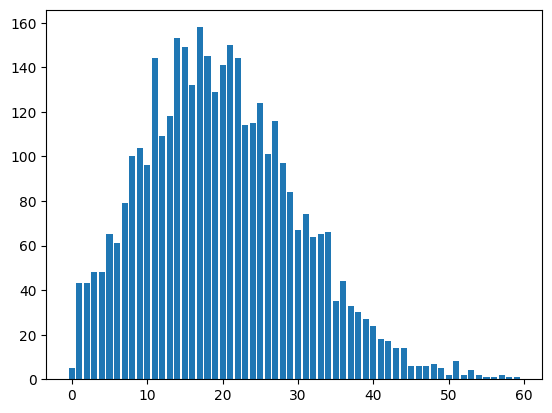

In [57]:
plot_sentences_lengths_distribution(sents_test)